# Implementar un algoritmo de aprendizaje de perceptrón en Python

## Una API perceptrón orientada a objetos


In [102]:
# importaciones de librerias 

import numpy as np

In [103]:
class Perceptron():
    """Perceptron Clasificador.

    Parametros
    ------------
    eta          : float --- Learning rate (between 0.0 and 1.0) (taza de aprendizaje)
    n_iter       : int   --- Passes over the training dataset.   (Nunero de iteraciones o epocas)
    random_state : int   --- Random number generator seed for random weight initialization. (semilla randndom)

    Attributes
    -----------
    w_      : 1d-array  --- Weights after fitting. (pesos de cada entrenamiento) 
                            con la cantidad de pesos por features (caracteristicas) mas 1 para el sego
    errors_ : list      --- Number of misclassifications (updates) in each epoch. (lista de errores de cada epoca)
    """
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta          = eta
        self.n_iter       = n_iter
        self.random_state = random_state

In [104]:
rgen = np.random.RandomState(1)

In [105]:
rgen.normal(3, 2.5, size=(2, 4))

array([[ 7.06086341,  1.47060897,  1.67957062,  0.31757844],
       [ 5.16351907, -2.75384674,  7.36202941,  1.09698275]])

In [106]:
rgen.normal(loc=0.0, scale=0.01, size=1 + 2)

array([ 0.00319039, -0.0024937 ,  0.01462108])

In [107]:
class Perceptron(Perceptron):
    
    def net_input(self, X):
        """Calcula """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where( self.net_input (X) >= 0.0 , 1 , -1 )

    def fit(self,X,y):
        """metodo de entrenamiento

        Args:
            X (array-like): features , shape = [n_samples, n_features]
            y (array-like): targets  , shape = [n_samples]

        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        # generamos el array aleatorio para los pesos por cada caracteristica mas  1 para el sesgo
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) #
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update       = self.eta * ( target - self.predict(xi) )
                self.w_[1:] += update * xi
                self.w_[0]  += update
                errors      += int( update != 0.0 )
            self.errors_.append(errors)
        return self


## Entrenando al perceptron con el dataset Iris

### Leemos el dataset

In [108]:
import pandas as pd

In [109]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.sample(15)

,0,1,2,3,4
69,5.6,2.5,3.9,1.1,Iris-versicolor
94,5.6,2.7,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
3,4.6,3.1,1.5,0.2,Iris-setosa
85,6.0,3.4,4.5,1.6,Iris-versicolor
19,5.1,3.8,1.5,0.3,Iris-setosa
62,6.0,2.2,4.0,1.0,Iris-versicolor
121,5.6,2.8,4.9,2.0,Iris-virginica
57,4.9,2.4,3.3,1.0,Iris-versicolor
115,6.4,3.2,5.3,2.3,Iris-virginica


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [111]:
df[4].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: 4, dtype: int64

## Vamos a graficar 2 clases del dataset

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [113]:

# seleccionamos setosa y versicolor
y = df.iloc[0:100, 4].values
print(y)
y = np.where(y == 'Iris-setosa', -1,1)
print(y)


['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [114]:
# Extraemos 2 caracteristicas  longitud de los sépalos y de los pétalos
X = df.iloc[0:100, [0, 2]].values
X.shape

(100, 2)

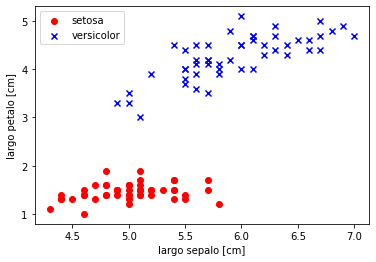

In [115]:

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('largo sepalo [cm]')
plt.ylabel('largo petalo [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

# Entrenamos al perceptron 

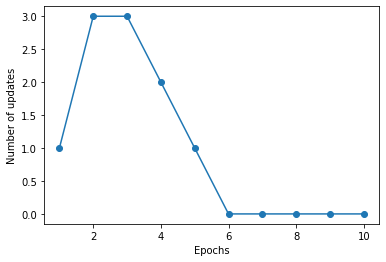

In [116]:

# instaciamos un perseptron con una taza de aprendizaje de 0.1 y 10 epocas
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [117]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    markers = ('s', 'X', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict( np.array( [xx1.ravel() , xx2.ravel() ] ).T)
    
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x         = X [y == cl, 0], 
                    y         = X [y == cl, 1],
                    alpha     = 1, 
                    c         = colors[idx],
                    marker    = markers[idx], 
                    label     = cl, 
                    edgecolor = 'black')

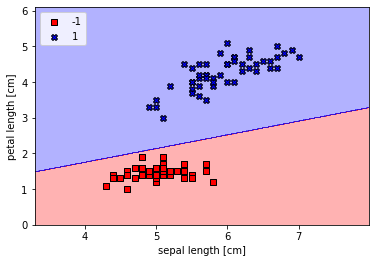

In [118]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

# Neuronas lineales adaptativas y la convergencia del aprendizaje


## Minimizar funciones de coste con el descenso de gradiente

ADAptive LInear NEuron classifier. AdelineGD

In [119]:
class AdalineGD(Perceptron):
    """ADAptive LInear NEuron classifier. AdelineGD
    Parametros
    ------------
    eta          : float --- Learning rate (between 0.0 and 1.0) (taza de aprendizaje)
    n_iter       : int   --- Passes over the training dataset.   (Nunero de iteraciones o epocas)
    random_state : int   --- Random number generator seed for random weight initialization. (semilla randndom)

    Attributes
    -----------
    w_      : 1d-array  --- Weights after fitting. (pesos de cada entrenamiento) 
                            con la cantidad de pesos por features (caracteristicas) mas 1 para el sego
    errors_ : list      --- Sum-of-squares cost function value in each epoch.

    Args:
        AdalineGD object
    """
    
    def activation (self, X):
        """Implementar la activacion
        en este caso la dejamos linear
        """
        return X
    
    def fit ( self , X , y):    
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Ten en cuenta que el método "activación" no produce ningún efecto 
            # sobre el código, puesto que es simplemente una función de identidad. 
            # En su lugar, podemos escribir directamente `output = self.net_input(X)`.
            # El objetivo de la activación es más conceptual, por ejemplo,   
            # en el caso de una regresión logística (como veremos más tarde), 
            # podríamos cambiarla a 
            # una función sigmoide para implementar un clasificador de regresión logística.
            output       = self.activation(net_input)
            errors       = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0]  += self.eta * errors.sum()
            cost         = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self


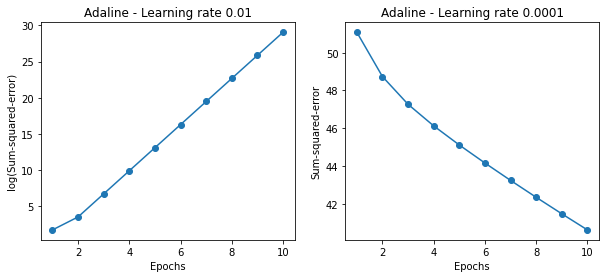

In [120]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)

ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)

ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

# Mejorar el descenso de gradiente mediante el escalado de características

In [121]:
# estandarizar características
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

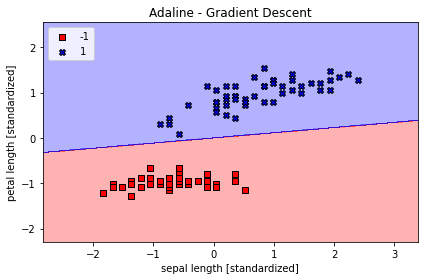

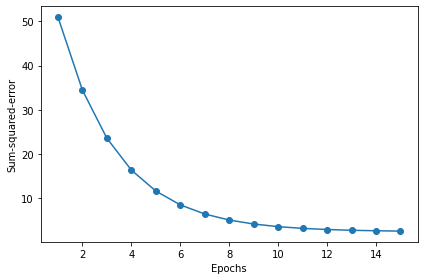

In [122]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

# Aprendizaje automático a gran escala y descenso de gradiente estocástico

In [123]:
class AdalineSGD(AdalineGD):
    
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        super().__init__(eta,n_iter,random_state)
        self.shuffle       = shuffle
        self.w_initialized = False

In [124]:
model = AdalineSGD(n_iter=15, eta=0.01, random_state=1)

In [125]:
model.__dict__

{'eta': 0.01,
 'n_iter': 15,
 'random_state': 1,
 'shuffle': True,
 'w_initialized': False}

In [135]:
class AdalineSGD(AdalineSGD):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta          : float   - Learning rate (between 0.0 and 1.0) taza de aprendizaje
    n_iter       : int     - Passes over the training dataset.  epocas
    shuffle      : bool (default: True) - Shuffles training data every epoch if True to prevent cycles. 
                        Mesclara  los datos de entrenamiento cada época si es True para evitar ciclos.
    random_state : int Random number generator seed for random weight initialization.


    Attributes
    -----------
    w_ : 1d-array |Weights after fitting.
    cost_ : list Sum-of-squares cost function value averaged over all
                training samples in each epoch.
    """
    
    def _initialize_weights(self, m):
        self.rgen          = np.random.RandomState(self.random_state)
        self.w_            = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
    
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error  = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0]  += self.eta * error
        cost         = 0.5 * error ** 2
        return cost
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self  
    

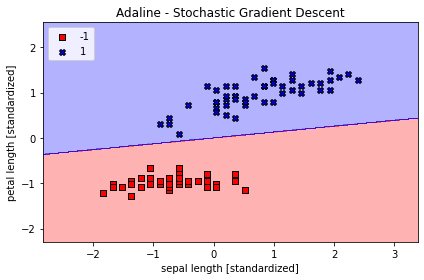

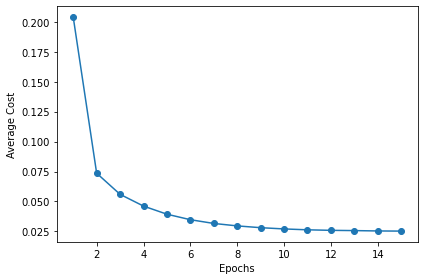

In [139]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1, shuffle = True)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

In [140]:
mod=ada.partial_fit(X_std[0, :], y[0])

In [141]:
mod.__dict__

{'eta': 0.01,
 'n_iter': 15,
 'w_initialized': True,
 'shuffle': True,
 'random_state': 1,
 'rgen': RandomState(MT19937) at 0x28221775040,
 'w_': array([ 3.00240727e-04, -1.38587196e-01,  1.07255807e+00]),
 'cost_': [0.20394456166031524,
  0.07361591599497305,
  0.05595915980120137,
  0.04616048513652026,
  0.039384514777334234,
  0.03477977825838303,
  0.031657219041863846,
  0.029612965517701775,
  0.02811985114187205,
  0.027075165024754613,
  0.026343115030327834,
  0.025908993480534163,
  0.025690816663739714,
  0.025388179942035075,
  0.025269618641442088]}